In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.metrics import r2_score

https://stackoverflow.com/questions/78520390/how-do-i-constrain-several-fit-parameters-to-sum-together-to-1-while-fitting-a-b

In [2]:
x = np.array([
 1.22212386e+00, 3.29623401e+01, 6.47035556e+01, 9.64437723e+01,
 1.28183988e+02, 1.59925204e+02, 1.91665421e+02, 2.23405636e+02,
 2.55145451e+02, 2.86886261e+02, 3.18627075e+02, 3.50366878e+02,
 3.82106686e+02, 4.13846500e+02, 4.45586303e+02, 4.77327118e+02,
 5.09067921e+02, 5.40807729e+02, 5.72547538e+02, 6.04287346e+02,
 6.36027155e+02, 6.67767964e+02, 6.99507773e+02, 7.31248581e+02,
 7.62988390e+02, 7.94728199e+02, 8.26468997e+02, 8.58208596e+02,
 8.89948201e+02, 9.21687811e+02, 9.53428532e+02, 9.85169347e+02,
 1.01690915e+03, 1.04864896e+03, 1.08038877e+03, 1.11212858e+03,
 1.14386839e+03, 1.17561019e+03, 1.20735000e+03, 1.23908982e+03,
 1.27082962e+03, 1.30256943e+03, 1.33431024e+03, 1.36605004e+03,
 1.39779085e+03, 1.42953066e+03, 1.46127048e+03, 1.49301128e+03,
 1.52475109e+03, 1.55649076e+03, 1.58823037e+03, 1.61997097e+03,
 1.65171057e+03, 1.68345118e+03, 1.71519078e+03, 1.74693039e+03,
 1.77866999e+03, 1.81040960e+03])
    
y = np.array([ 
 1.,         0.92072946, 0.93392534, 0.92599632, 0.84650909,     0.89966649,
 0.85375192, 0.8359797,  0.81487989, 0.83947038, 0.78711305, 0.77231505,
 0.74861849, 0.67860406, 0.73989558, 0.78446446, 0.72500833, 0.72903779,
 0.69205116, 0.73345758, 0.71143277, 0.71248356, 0.67470885, 0.67626045,
 0.63480034, 0.68824323, 0.69961798, 0.68302773, 0.64354886, 0.64451215,
 0.63644302, 0.63616151, 0.63049777, 0.62942254, 0.67511705, 0.62839769,
 0.61536734, 0.58931514, 0.60952486, 0.59674224, 0.55770579, 0.58915328,
 0.5567563 , 0.58849712, 0.50377624, 0.50890445, 0.5446239,  0.51436443,
 0.52945348, 0.55326716, 0.51701847, 0.5240366,  0.54487462, 0.50567212,
 0.49233296, 0.5107218,  0.56567484, 0.48162376])

In [3]:
def model(x, y0, a1, k1, a2, k2):
    return y0 + a1 * np.exp(-k1 * x) + a2 * np.exp(-k2 * x)

In [4]:
def constraint(p):
    return p[0] + p[1] + p[3] - 1

In [5]:
def factory(x, y, model):
    def wrapped(p):
        return 0.5 * np.sum(np.power((y - model(x, *p)), 2))
    return wrapped

In [6]:
objective = factory(x, y, model)

In [10]:
sol = optimize.minimize(
    objective,
    x0=[0, 0, 0, 0, 0],
    bounds=[(0., np.inf)]*5,
    constraints=[{"type": "eq", "fun": constraint}]
)
sol

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.019907739276457715
       x: [ 9.223e-02  1.463e-01  6.761e-03  7.615e-01  3.479e-04]
     nit: 53
     jac: [ 1.569e-02  1.867e-02 -1.349e-02  1.672e-02  2.817e+00]
    nfev: 332
    njev: 53

In [11]:
constraint(sol.x)

0.0

In [19]:
yhat = model(x, *sol.x)
score = r2_score(y, yhat)
score

0.9581254317380687

In [15]:
xlin = np.linspace(x.min(), x.max(), 200)
ylin = model(xlin, *sol.x)

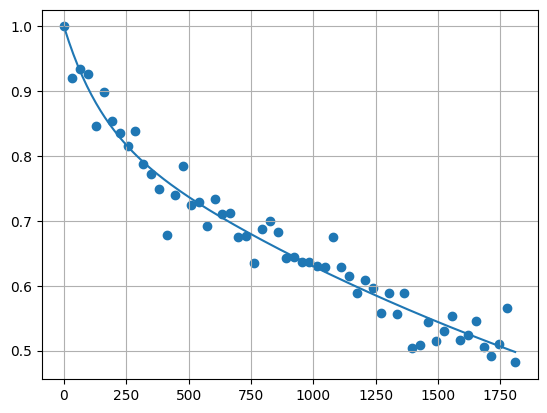

In [16]:
fig, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(xlin, ylin)
axe.grid()